In [1]:
# Import all dependencies
import pandas as pd
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.dates as mdates
from PIL import Image, ImageDraw, ImageFont

In [2]:
print(os.getcwd())

c:\Users\theli\Desktop\Gitlab\team-7-project3\Resources\working_files


In [3]:
#file_directory = os.path.dirname(__file__) #Find directory of script. Reference 1 in README file.

#link = 'Bitcoin_6_11_2010-8_10_2010_historical_data_coinmarketcap.csv'
current_dir = os.getcwd()

# Files to load and output
file_to_load = os.path.join(current_dir,'data.csv')  # Input file path
#file_to_output = os.path.join(file_directory,"analysis", "budget_analysis.txt")  # Output file path


row_list=[]
row_data = []
with open(file_to_load) as bitcoin_data:
    reader = csv.reader(bitcoin_data, delimiter=';')
    # Skip the header row
    header = next(reader)
    header = header[0:11]
    # Track the total and net change

    # Process each row of data
    for row in reader:
        row_list = row[0].split(';')
        for i, value in enumerate(row_list):
            if i < 12:
                if 3 < i < 11: 
                    row_list[i] = float(value.replace('"', ''))
                    #print
                    #print(row_list[i],'\n')
                else:
                    row_list[i] = datetime.strptime(value.replace('"', ''), "%Y-%m-%dT%H:%M:%S.%fZ")
                    #print(i)
                    #print(row_list[i],'\n')
        row_data.append(row_list[0:11])

In [4]:
# Load the data into a dataframe
df = pd.DataFrame(columns = header, data = row_data)
df.head()

,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap
0,2025-01-15,2025-01-15 23:59:59.999,2025-01-15 20:22:00,2025-01-15 00:05:00,2781.0,96534.045969,100697.234363,96501.644393,100504.493441,5.780592e+10,1.991112e+12
1,2025-01-14,2025-01-14 23:59:59.999,2025-01-14 09:54:00,2025-01-14 00:46:00,2781.0,94519.007141,97352.664748,94322.154504,96534.044215,5.376968e+10,1.912474e+12
2,2025-01-13,2025-01-13 23:59:59.999,2025-01-13 00:38:00,2025-01-13 14:37:00,2781.0,94488.892174,95837.000226,89260.100189,94516.525627,7.297900e+10,1.872375e+12
3,2025-01-12,2025-01-12 23:59:59.999,2025-01-12 15:23:00,2025-01-12 09:50:00,2781.0,94565.725832,95367.536299,93712.511672,94488.441062,2.088513e+10,1.871766e+12
4,2025-01-11,2025-01-11 23:59:59.999,2025-01-11 21:56:00,2025-01-11 04:38:00,2781.0,94700.838053,94977.687665,93840.043524,94566.593675,1.886089e+10,1.873238e+12


In [5]:
# Rename the 'timeOpen' column to 'timeOpen'
df.rename(columns = {'﻿timeOpen': 'timeOpen'}, inplace=True)

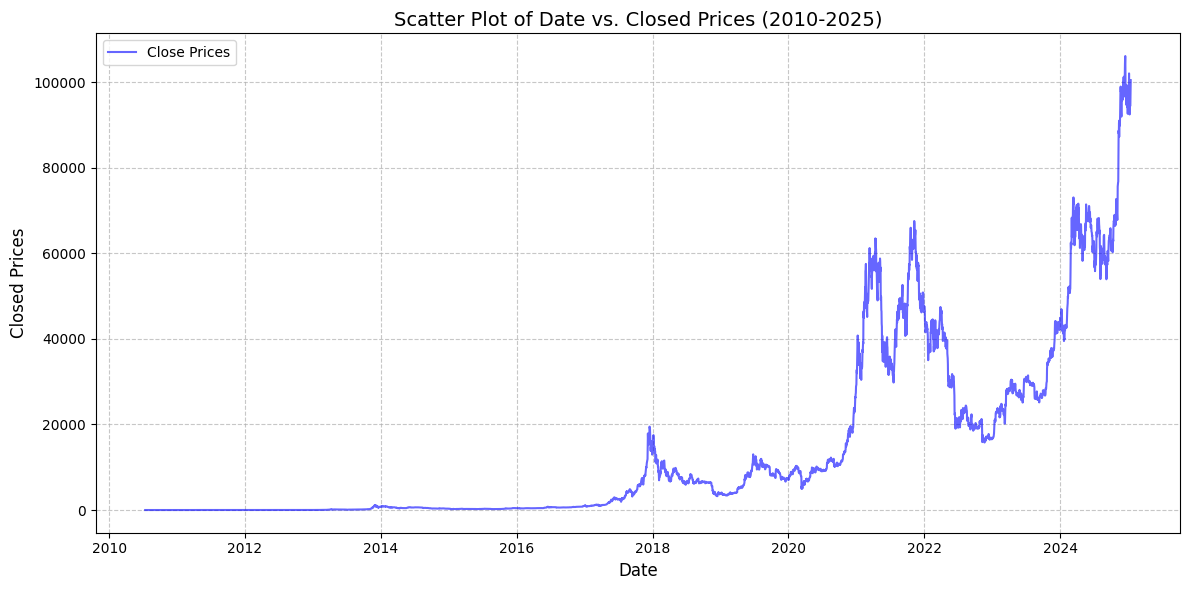

In [6]:
# Convert the 'timeOpen' column to datetime format for better handling of dates
df['timeOpen'] = pd.to_datetime(df['timeOpen'], errors='coerce')

# Filter out any rows with invalid dates or missing close prices
filtered_data = df.dropna(subset=['timeOpen', 'close'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['timeOpen'], filtered_data['close'],'-', color='blue', alpha=0.6, label='Close Prices')

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closed Prices', fontsize=12)
plt.title('Scatter Plot of Date vs. Closed Prices (2010-2025)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
# Get the last / recent 30 rows
last_30_days = df.head(30)
last_30_days

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap
0,2025-01-15,2025-01-15 23:59:59.999,2025-01-15 20:22:00,2025-01-15 00:05:00,2781.0,96534.045969,100697.234363,96501.644393,100504.493441,5.780592e+10,1.991112e+12
1,2025-01-14,2025-01-14 23:59:59.999,2025-01-14 09:54:00,2025-01-14 00:46:00,2781.0,94519.007141,97352.664748,94322.154504,96534.044215,5.376968e+10,1.912474e+12
2,2025-01-13,2025-01-13 23:59:59.999,2025-01-13 00:38:00,2025-01-13 14:37:00,2781.0,94488.892174,95837.000226,89260.100189,94516.525627,7.297900e+10,1.872375e+12
3,2025-01-12,2025-01-12 23:59:59.999,2025-01-12 15:23:00,2025-01-12 09:50:00,2781.0,94565.725832,95367.536299,93712.511672,94488.441062,2.088513e+10,1.871766e+12
4,2025-01-11,2025-01-11 23:59:59.999,2025-01-11 21:56:00,2025-01-11 04:38:00,2781.0,94700.838053,94977.687665,93840.043524,94566.593675,1.886089e+10,1.873238e+12
5,2025-01-10,2025-01-10 23:59:59.999,2025-01-10 17:59:00,2025-01-10 15:15:00,2781.0,92494.491506,95770.611596,92250.092737,94701.456463,6.205869e+10,1.875885e+12
6,2025-01-09,2025-01-09 23:59:59.999,2025-01-09 01:25:00,2025-01-09 20:23:00,2781.0,95043.487640,95349.721460,91220.842260,92484.036972,6.277726e+10,1.832169e+12
7,2025-01-08,2025-01-08 23:59:59.999,2025-01-08 01:00:00,2025-01-08 17:32:00,2781.0,96924.164974,97258.321748,92525.844561,95043.523456,6.387586e+10,1.882572e+12
8,2025-01-07,2025-01-07 23:59:59.999,2025-01-07 00:37:00,2025-01-07 20:25:00,2781.0,102248.852548,102712.485697,96132.874701,96922.705280,5.868574e+10,1.919788e+12
9,2025-01-06,2025-01-06 23:59:59.999,2025-01-06 16:30:00,2025-01-06 01:22:00,2781.0,98314.956958,102482.873910,97926.148517,102078.085573,5.182343e+10,2.021810e+12


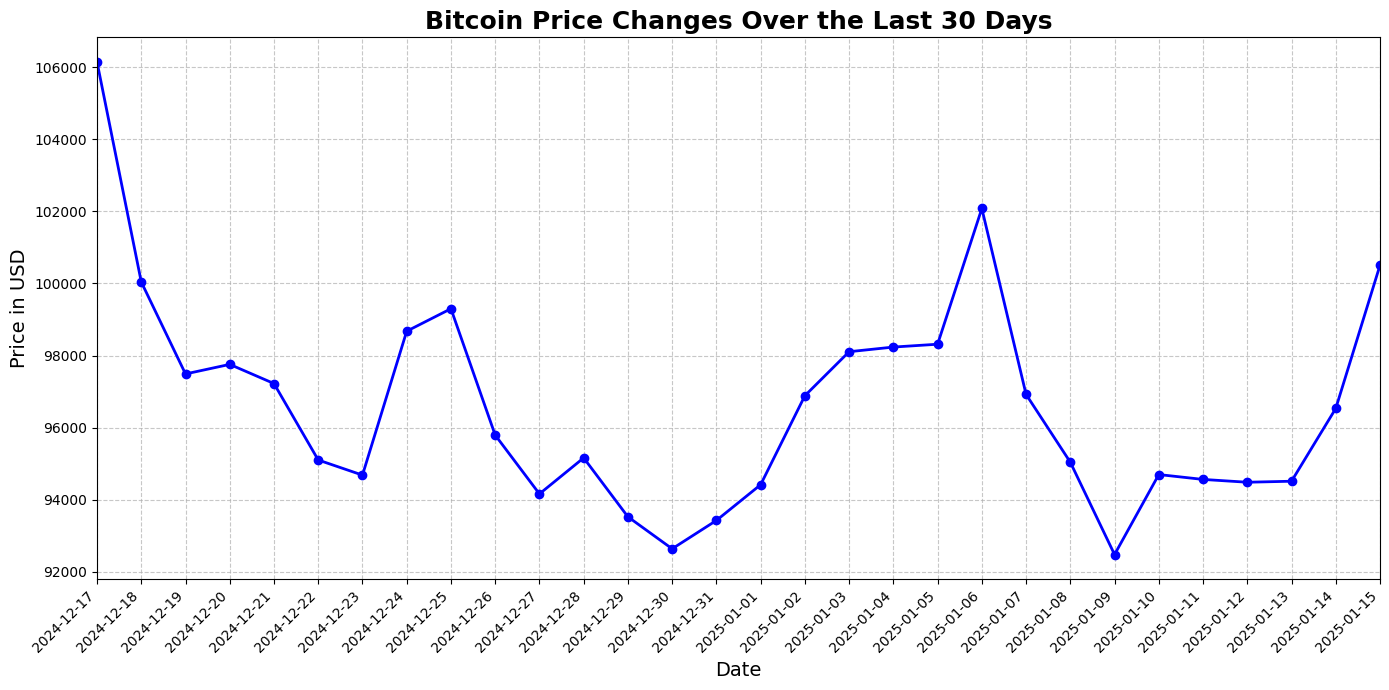

In [8]:
plt.figure(figsize=(14, 7)) 
plt.plot(last_30_days['timeOpen'], last_30_days['close'], marker='o', linestyle='-', color='blue', markersize=6, linewidth=2)

# Ensure x-axis is limited to 30-day period
plt.gca().set_xlim([last_30_days['timeOpen'].min(), last_30_days['timeOpen'].max()])

# Set x-axis ticks to correspond to the data points
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Rotate and align the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels 
plt.title('Bitcoin Price Changes Over the Last 30 Days', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)

# Add gridlines to improve readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
# Check the column datatype
print(df.columns)

Index(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
       'low', 'close', 'volume', 'marketCap'],
      dtype='object')


In [10]:
# List the columns
print(df.columns.tolist())

['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high', 'low', 'close', 'volume', 'marketCap']


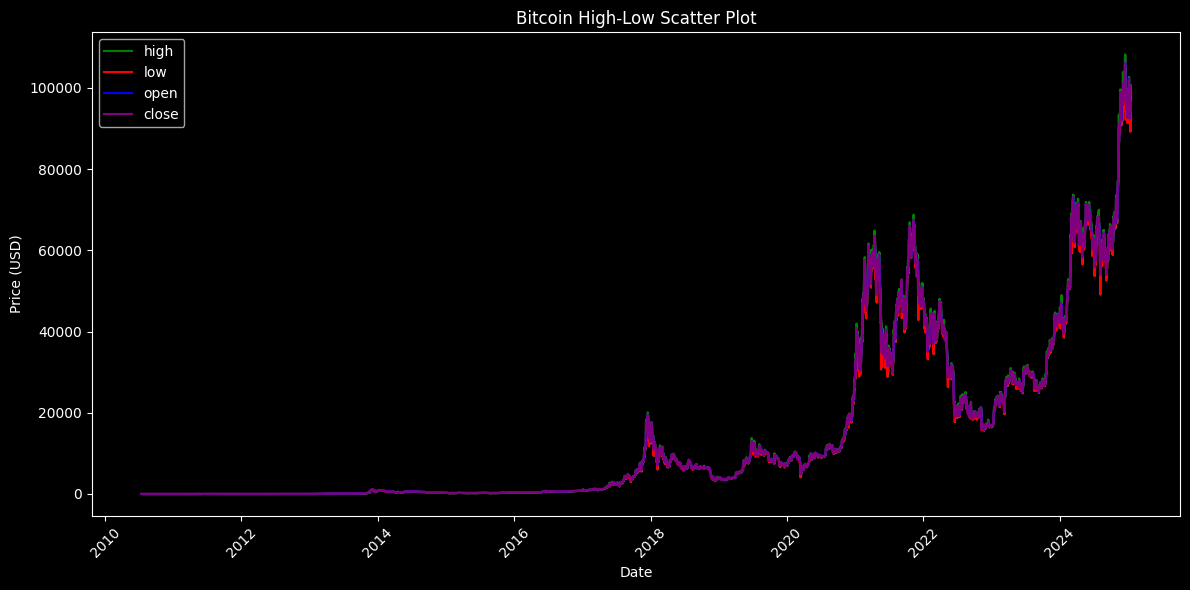

In [12]:
# Use Matplotlib to create the high-low chart
plt.figure(figsize=(12,6))
plt.plot(df['timeOpen'], df['high'], label = 'high', color = 'green')
plt.plot(df['timeOpen'], df['low'], label = 'low', color = 'red')
plt.plot(df['timeOpen'], df['open'], label = 'open', color = 'blue')
plt.plot(df['timeOpen'], df['close'], label = 'close', color = 'purple')
plt.fill_between(df['timeOpen'], df['high'], df['low'], color = 'lightgray', alpha = 0.5)
plt.title('Bitcoin High-Low Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.style.use('dark_background')
plt.show()

In [13]:
# Create the candlestick chart
fig1 = go.Figure(data = [go.Candlestick(x = df['timeOpen'], open = df['open'], high = df['high'], low = df['low'], close = df['close'], name = 'Candlestick'),
                        go.Scatter(x = df['timeOpen'], y = df['open'], mode = 'lines', name = 'Open Price', line = dict(color = 'blue')),
                        go.Scatter(x = df['timeOpen'], y = df['high'], mode = 'lines', name = 'High Price', line = dict(color = 'green')),
                        go.Scatter(x = df['timeOpen'], y = df['low'], mode = 'lines', name = 'Low Price', line = dict(color = 'red')),
                        go.Scatter(x = df['timeOpen'], y = df['close'], mode = 'lines', name = 'Close Price', line = dict(color = 'purple'))])

# Update the layout
fig1.update_layout(title = 'Bitcoin High-Low Candlestick', xaxis_title = 'Date', yaxis_title = 'Price (USD)', template = 'plotly_dark', xaxis_rangeslider_visible = True)
fig1.update_layout(xaxis = dict(rangeselector = dict(buttons = list([dict(count = 1, label = '1 Day', step = 'day', stepmode = 'backward'),
                                                                    dict(count = 7, label = '1 Week', step = 'day', stepmode = 'backward'),
                                                                    dict(count = 1, label = '1 Month', step = 'month', stepmode = 'backward'),
                                                                    dict(count = 3, label = '3 Months', step = 'month', stepmode = 'backward'),
                                                                    dict(count = 1, label = '1 Year', step = 'year', stepmode = 'backward'),
                                                                    dict(label = 'All', step = 'all'),])),
                                                                    rangeslider = dict(visible = True),
                                                                    type = 'date'))

# Generate the figure
fig1.show()

In [14]:
# generate interactive line chart
fig2 = go.Figure()

# Add traces for each price
fig2.add_trace(go.Scatter(x = df['timeOpen'], y = df['open'], mode = 'lines', name ='Open Price', line = dict(color = 'blue')))
fig2.add_trace(go.Scatter(x = df['timeOpen'], y = df['high'], mode = 'lines', name = 'High Price', line = dict(color = 'red')))
fig2.add_trace(go.Scatter(x = df['timeOpen'], y = df['low'], mode = 'lines', name = 'Low Price', line = dict(color = 'green')))
fig2.add_trace(go.Scatter(x = df['timeOpen'], y = df['close'], mode = 'lines', name = 'Close Price', line = dict(color = 'purple')))

# Update the layout
fig2.update_layout(title = 'Bitcoin Price Over Years', xaxis_title = 'Date', yaxis_title = 'Price (USD)', legend_title = 'Price Type', template = 'plotly_dark')

# Show the figure
fig2.show()

In [15]:
# Filter timeOpen column based on whether date is first day of the month
df = df[df['timeOpen'].dt.is_month_start]

# Display the DataFrame
df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap
14,2025-01-01,2025-01-01 23:59:59.999,2025-01-01 21:25:00,2025-01-01 09:28:00,2781.0,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12
45,2024-12-01,2024-12-01 23:59:59.999,2024-12-01 22:01:00,2024-12-01 02:59:00,2781.0,96461.336800,97888.127270,95770.184465,97279.792922,3.659070e+10,1.924785e+12
75,2024-11-01,2024-11-01 23:59:59.999,2024-11-01 14:31:00,2024-11-01 02:12:00,2781.0,70216.896968,71559.016570,68779.700341,69482.469851,4.998980e+10,1.374188e+12
106,2024-10-01,2024-10-01 23:59:59.999,2024-10-01 07:40:00,2024-10-01 20:42:00,2781.0,63335.603584,64110.981999,60189.278697,60837.009701,5.022092e+10,1.202222e+12
136,2024-09-01,2024-09-01 23:59:59.999,2024-09-01 00:17:00,2024-09-01 23:19:00,2781.0,58969.799454,59062.070812,57217.823863,57325.487689,2.459245e+10,1.132107e+12


In [16]:
# Define the max price in the close column
max = df['close'].max()

# Define the percentages of close price / max close price and reverse the order
percentage = [value / max for value in df['close'].to_list()][::-1]

# Extract all dates from the filtered timeOpen column and reverse the order
dates = [str(i) for i in df['timeOpen'].to_list()][::-1]

# Extract all prices from the filtered close column and reverse the order
prices = [i for i in df['close'].to_list()][::-1]

# Display percentage list
percentage

[6.215543658512934e-07,
 6.450262496969185e-07,
 6.211211823633964e-07,
 2.0178470173828815e-06,
 2.5521177887185383e-06,
 3.0838881435474066e-06,
 7.119788593226245e-06,
 9.664782394740645e-06,
 8.006965029435192e-06,
 3.701612166130007e-05,
 9.800047783417023e-05,
 0.0001766077223633953,
 0.00013714983584153895,
 8.668583481392331e-05,
 5.4208524006717175e-05,
 3.337049404074107e-05,
 3.139548819185581e-05,
 5.275967275235138e-05,
 5.917606079398912e-05,
 5.0577543724081045e-05,
 5.0511617391311e-05,
 5.1398135725790116e-05,
 5.373375552075973e-05,
 6.842702199533834e-05,
 9.769795868691537e-05,
 0.00010643428022368432,
 0.00012776274606094234,
 0.00011253686517134996,
 0.00012950902475764546,
 0.00013879025257358698,
 0.00021097955365079093,
 0.00035010527938914964,
 0.0010235228747811028,
 0.0012026135577526975,
 0.0013291558212402983,
 0.0009051212015025301,
 0.0010690812230964343,
 0.0014220835816161383,
 0.0013587610407569423,
 0.002119453449498636,
 0.00982578135573145,
 0.0079

In [17]:
# GIF creation

# Define variables
logo_path = "../bitcoin_logo.png" 
output_gif = "../../output/filled_bitcoin.gif"
fill_color = (255, 153, 0, 255)  # Bitcoin Orange fill color
font_path = "arial.ttf"
font_size = 50 # Font for text
font = ImageFont.truetype(font_path, font_size)  # Load the font with the specified size

# Create frames and durations for the GIF
frames = []
frame_durations = []  # List to hold the duration of each frame

# Loop to iterate through each item in percentage
for i, value in enumerate(percentage):
    
    # Open the Bitcoin logo
    logo = Image.open(logo_path).convert("RGBA")
    width, height = logo.size

    # Create a mask for the circular area
    mask = Image.new("L", (width, height), 0)
    draw = ImageDraw.Draw(mask)
    circle_bounds = (0, 0, width, height)
    draw.ellipse(circle_bounds, fill=255)  # White (255) means inside the mask
    date_text = dates[i]
    price_text = f"Price: ${prices[i]:,.2f}"

    # Create a fully transparent frame (logo size + extra height for text)
    final_frame = Image.new("RGBA", (width, height + 100), (255, 255, 255, 0))  # Transparent background
    filled_frame = Image.new("RGBA", (width, height), (255, 255, 255, 0))  # Transparent layer for the fill

    # Draw the fill inside the logo area
    fill_height = height * value
    box = (0, height - fill_height, width, height)

    # Draw the filled portion
    ImageDraw.Draw(filled_frame).rectangle(box, fill=fill_color)
    filled_area = Image.composite(filled_frame, Image.new("RGBA", (width, height), (255, 255, 255, 0)), mask)

    # Combine the fill with the logo
    logo_with_fill = Image.alpha_composite(filled_area, logo)
    final_frame.paste(logo_with_fill, (0, 100))  # Paste the filled logo lower to leave room for text

    # Generate text and place above logo
    draw = ImageDraw.Draw(final_frame)
    text_x = width // 2
    draw.text((text_x, 10), date_text, font=font, fill="white", anchor="mm")  # Center the date text
    draw.text((text_x, 60), price_text, font=font, fill="white", anchor="mm")  # Center the price text

    # Append the final frame to the frames list
    frames.append(final_frame)

    # Determine the duration for the frame
    if prices[i] == max:
        frame_durations.append(3000)  # 5 seconds for max price
    elif 0.8 * max < prices[i] < 1.2 * max:
        frame_durations.append(1500)
    else:
        frame_durations.append(5)  # Default duration (100 ms)

# Save the GIF
frames[0].save(
    output_gif,
    save_all=True,
    append_images=frames[1:],
    duration=frame_durations,  # Custom durations for each frame
    loop=0,
    disposal=2  # Clear each frame before drawing the next one
)

# Confirmation of saved GIF
print(f"GIF saved to {output_gif}")

GIF saved to ../../output/filled_bitcoin.gif
